Sela Rabila | 0110218109 | TI 2017 Sore

1. Import essential library

In [46]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

2. Load Dataset

In [78]:
col_names = ['Code_Number','Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
bcw = pd.read_csv("breast-cancer-wisconsin.data", header=None, names=col_names)
bcw.head()

,Code_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


3. Checking any missing value

In [79]:
bcw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code_Number                  699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [80]:
bcw['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

4. General Statics

Text(0.5, 1.0, 'General Statics of Breast Cancer Wisconsin Dataset')

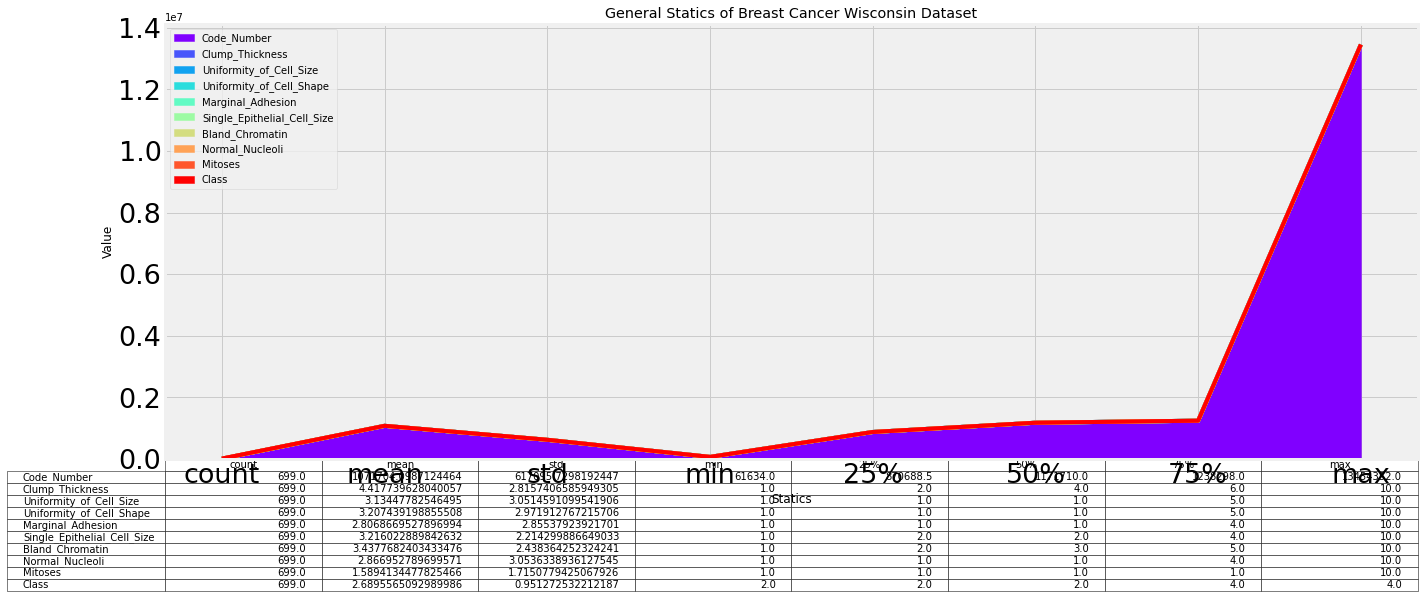

In [81]:
bcw.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statics',)
plt.ylabel('Value')
plt.title("General Statics of Breast Cancer Wisconsin Dataset")

5. Visualization

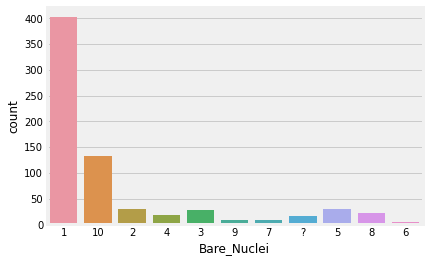

In [82]:
#COUNTPLOT
sns.countplot('Bare_Nuclei', data=bcw)
plt.show()

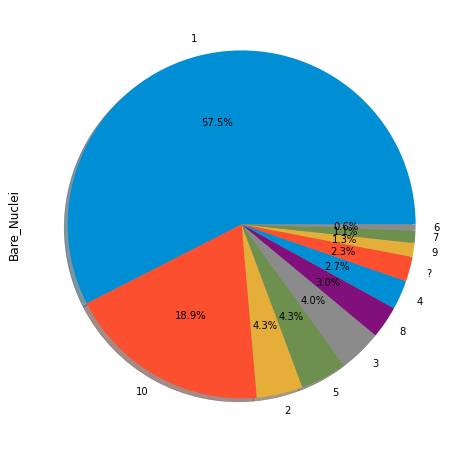

In [83]:
bcw['Bare_Nuclei'].value_counts().plot.pie(x=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

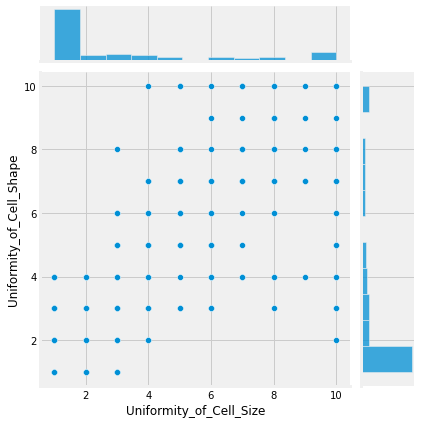

In [84]:
#JOINTPLOT
fig=sns.jointplot(x='Uniformity_of_Cell_Size',y='Uniformity_of_Cell_Shape', data=bcw)

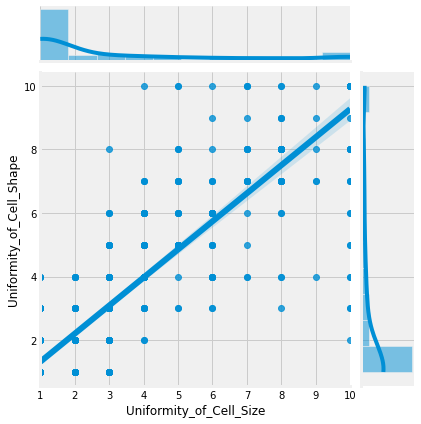

In [85]:
sns.jointplot("Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", data=bcw, kind="reg")

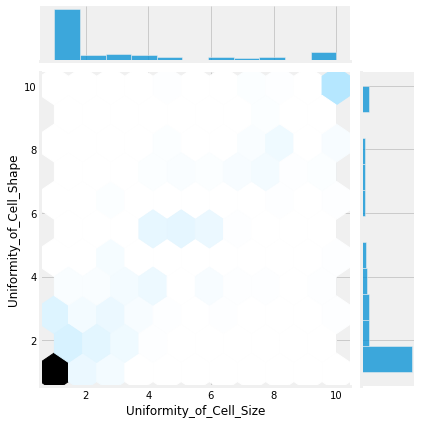

In [86]:
fig=sns.jointplot(x='Uniformity_of_Cell_Size', y='Uniformity_of_Cell_Shape', kind='hex', data=bcw)

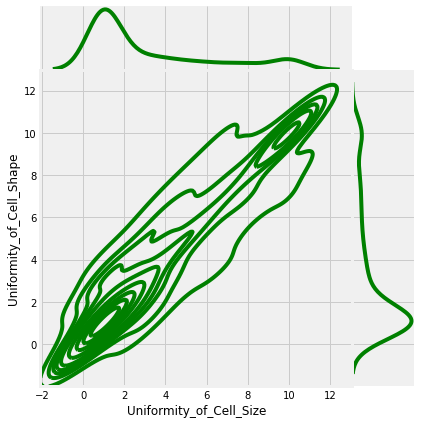

In [87]:
sns.jointplot("Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", data=bcw, kind="kde",space=0,color='g')

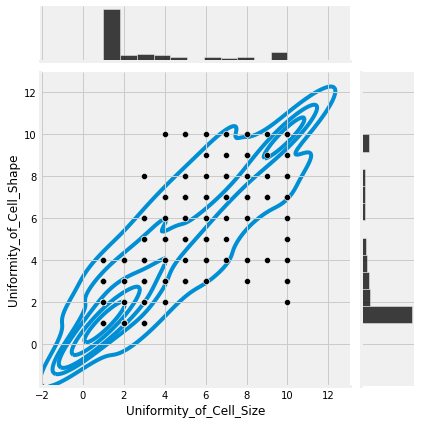

In [88]:
g = (sns.jointplot("Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", data=bcw, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

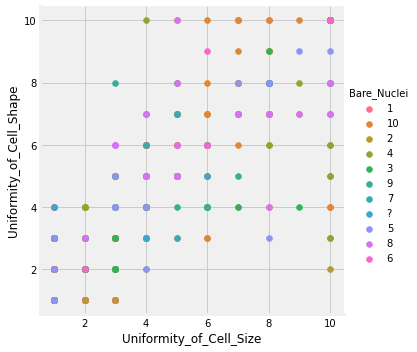

In [90]:
#FACETGRID
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(bcw,hue='Bare_Nuclei',size=5)\
.map(plt.scatter,'Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape')\
.add_legend()

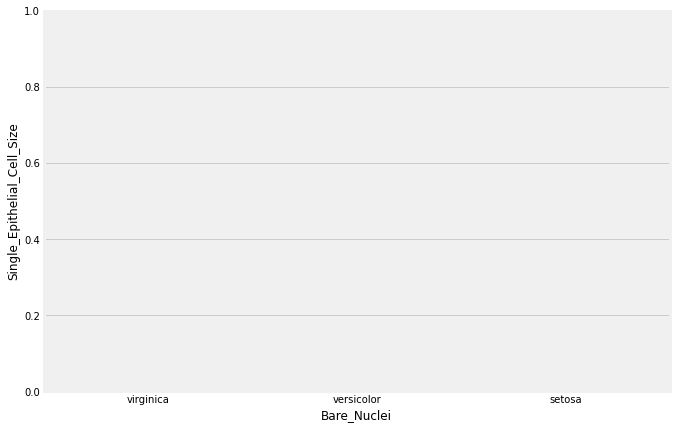

In [97]:
#BOXPLOT
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Bare_Nuclei',y='Single_Epithelial_Cell_Size',data=bcw,order=['virginica','versicolor','setosa'],linewidth=2.5,orient='v',dodge=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16ce4e0fd0>,
      dtype=object)

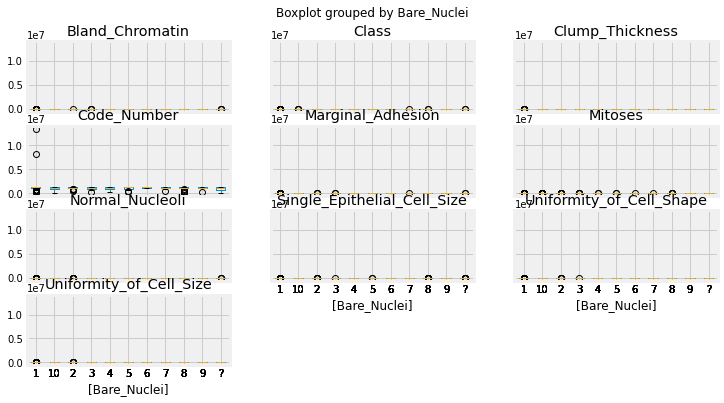

In [98]:
bcw.boxplot(by="Bare_Nuclei", figsize=(12, 6))

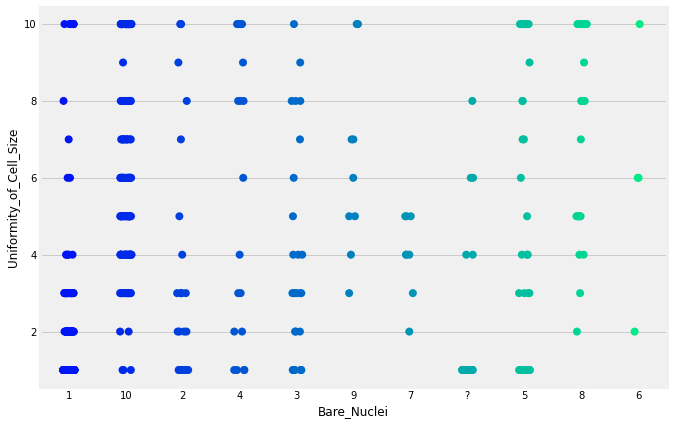

In [99]:
#STRIPPLOT
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='Bare_Nuclei',y='Uniformity_of_Cell_Size',data=bcw,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

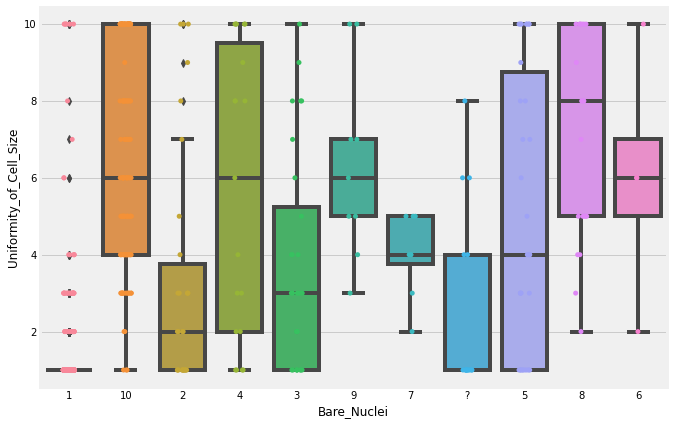

In [100]:
#COMBINATION OF BOXPLOT AND STRIPPLOT
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Bare_Nuclei',y='Uniformity_of_Cell_Size',data=bcw)
fig=sns.stripplot(x='Bare_Nuclei',y='Uniformity_of_Cell_Size',data=bcw,jitter=True,edgecolor='gray')

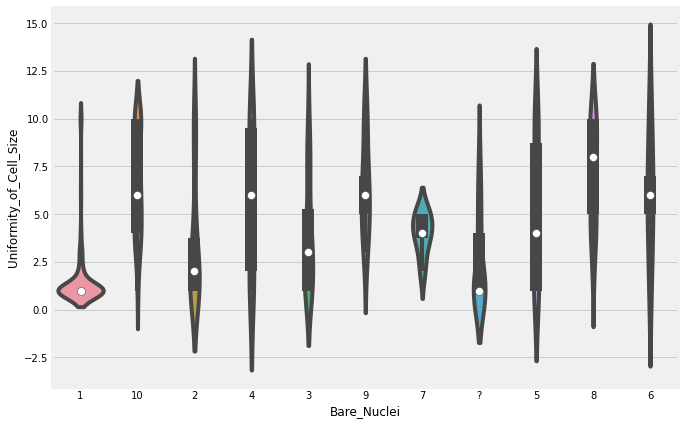

In [101]:
#VIOLINPLOT
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot (x='Bare_Nuclei', y='Uniformity_of_Cell_Size', data=bcw)

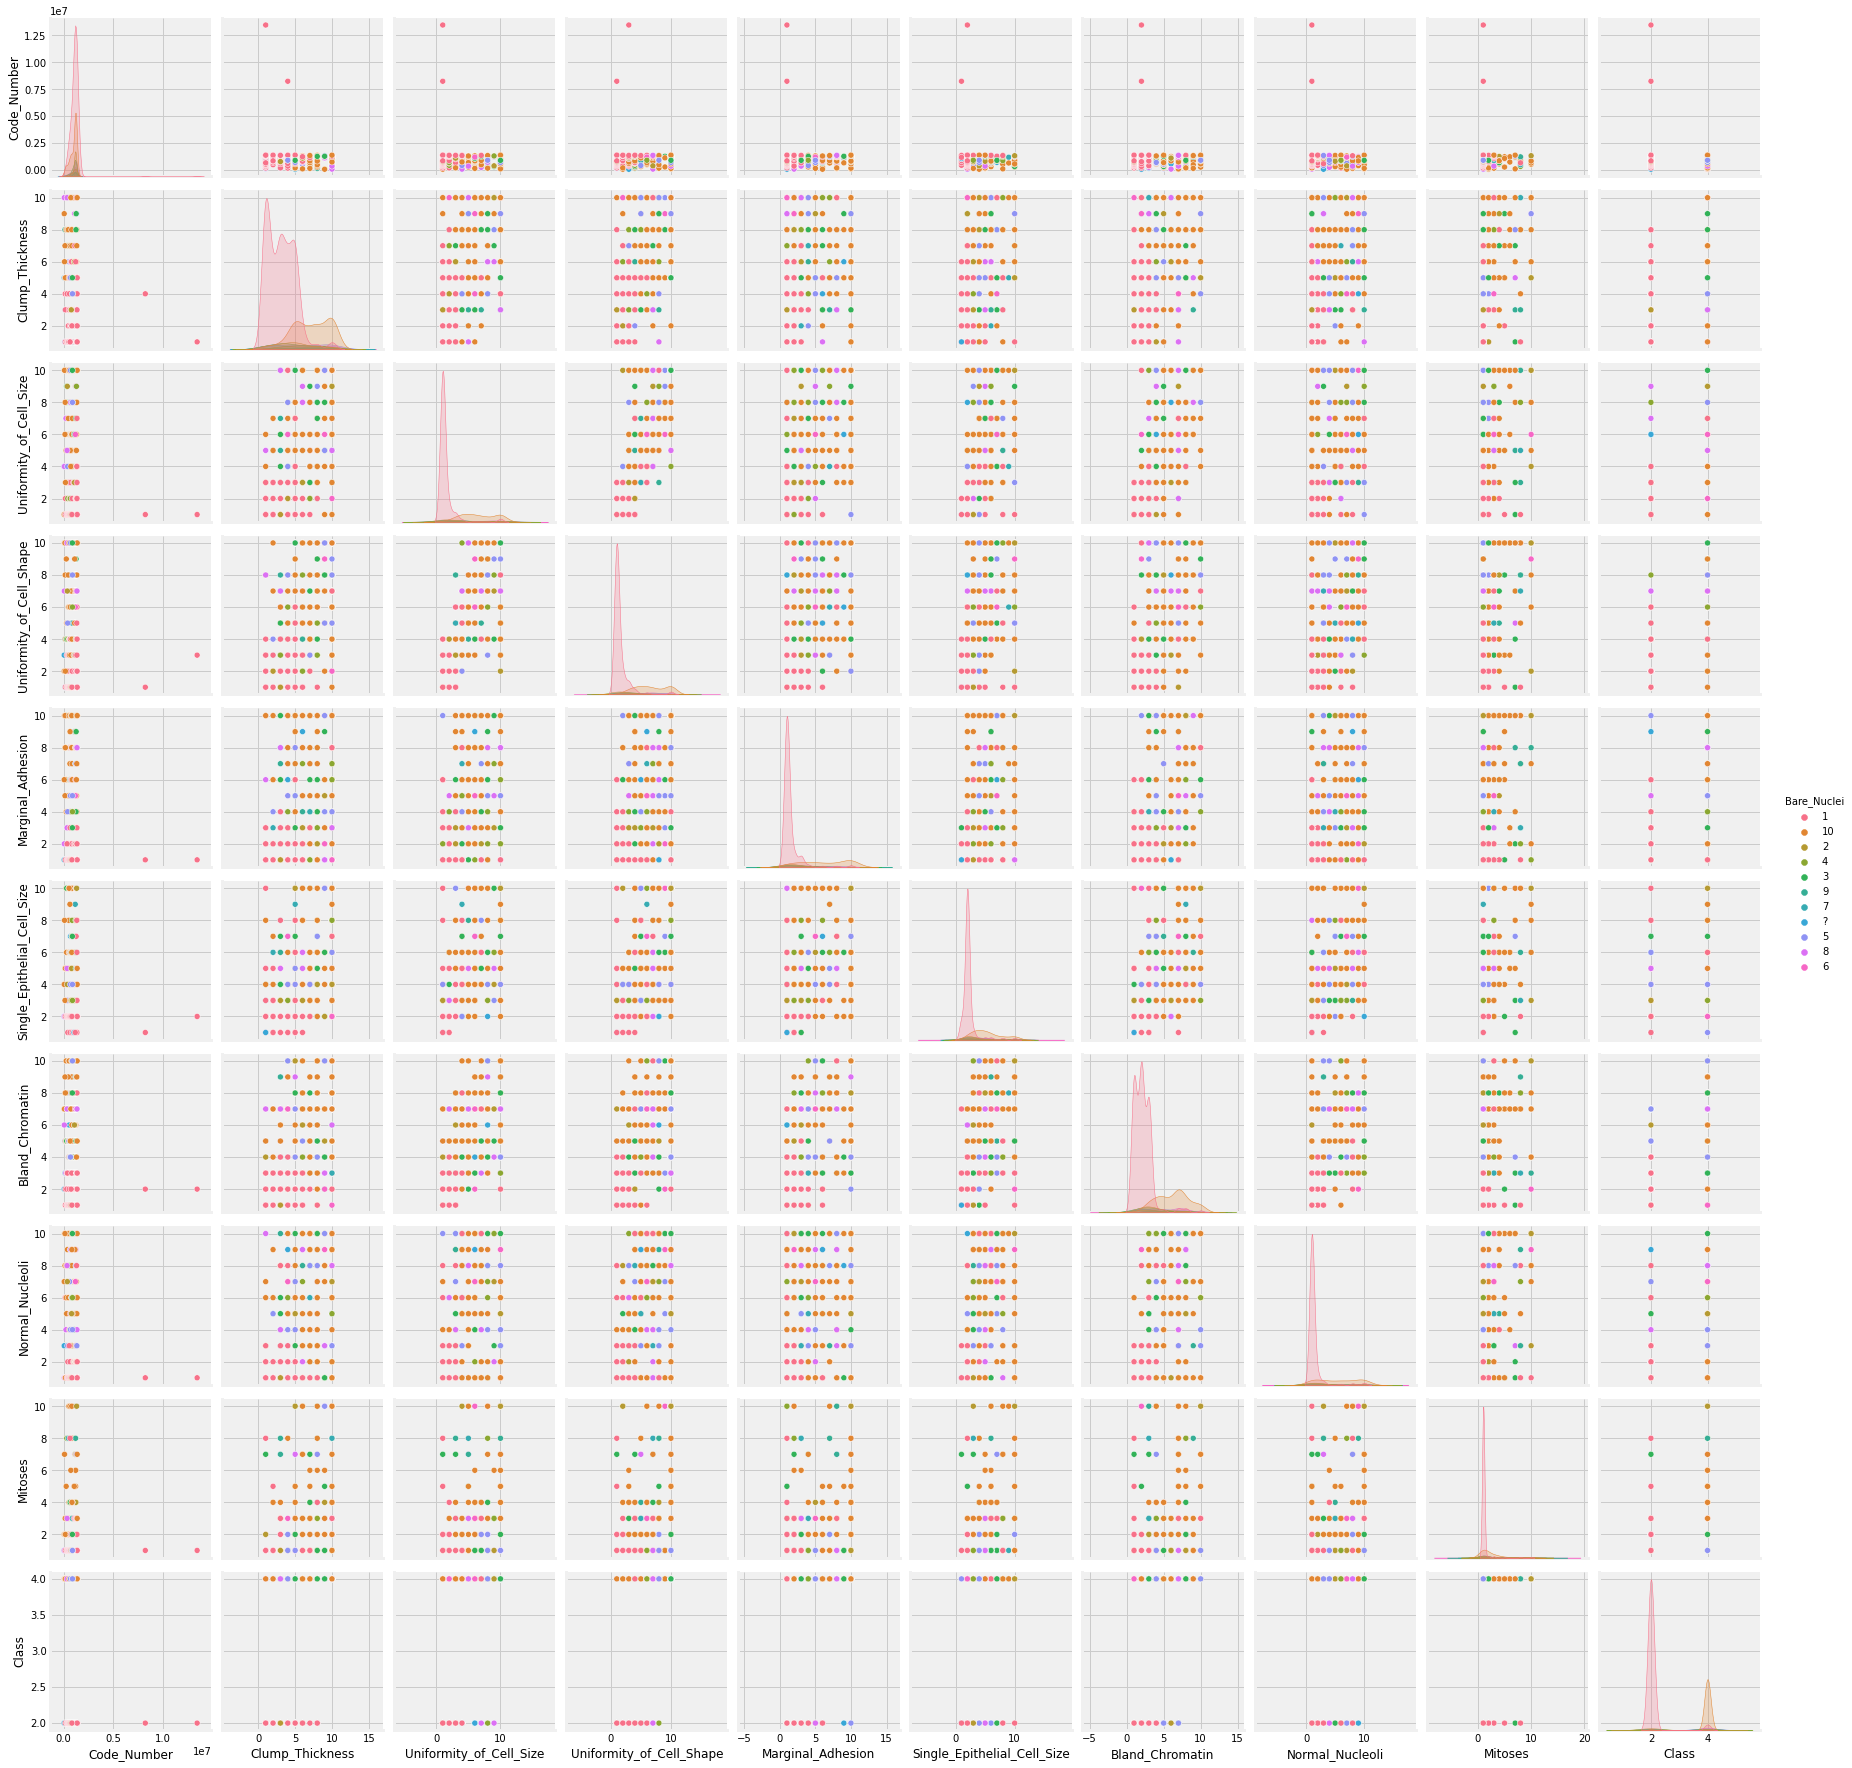

In [103]:
#PAIRPLOT
sns.pairplot(bcw,hue='Bare_Nuclei')

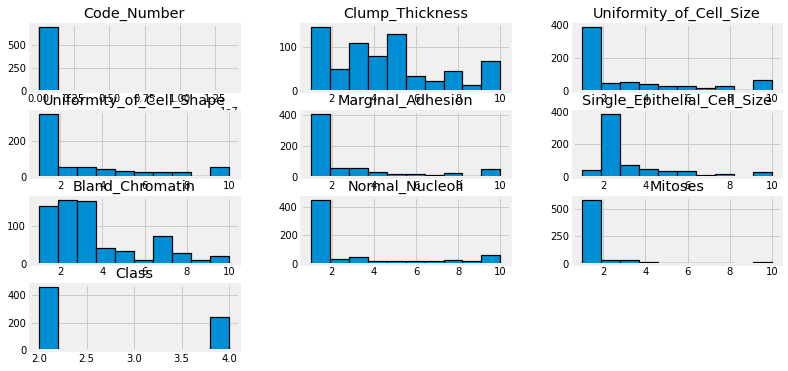

In [104]:
#HISTOGRAM
bcw.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

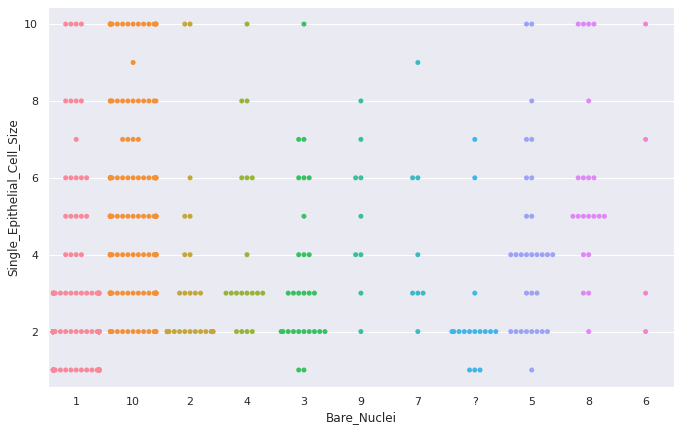

In [105]:
#SWARMPLOT
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Bare_Nuclei", y="Single_Epithelial_Cell_Size", data=bcw)

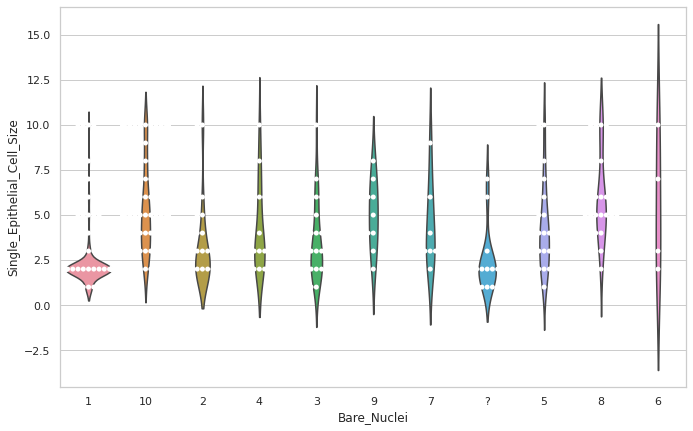

In [106]:
#VIOLIN + WARMPLOT
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="Bare_Nuclei", y="Single_Epithelial_Cell_Size", data=bcw, inner=None)
ax = sns.swarmplot(x="Bare_Nuclei", y="Single_Epithelial_Cell_Size", data=bcw,color="white", edgecolor="black")

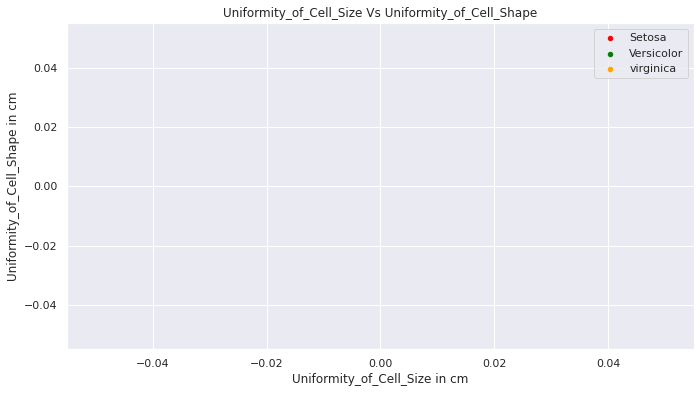

In [108]:
#SPECIES BASED CLASSIFICATION
sns.set(style="darkgrid")
sc=bcw[bcw.Bare_Nuclei=='setosa'].plot(kind='scatter',x='Uniformity_of_Cell_Size',y='Uniformity_of_Cell_Shape',color='red',label='Setosa')
bcw[bcw.Bare_Nuclei=='versicolor'].plot(kind='scatter',x='Uniformity_of_Cell_Size',y='Uniformity_of_Cell_Shape',color='green',label='Versicolor',ax=sc)
bcw[bcw.Bare_Nuclei=='virginica'].plot(kind='scatter',x='Uniformity_of_Cell_Size',y='Uniformity_of_Cell_Shape',color='orange', label='virginica', ax=sc)
sc.set_xlabel('Uniformity_of_Cell_Size in cm')
sc.set_ylabel('Uniformity_of_Cell_Shape in cm')
sc.set_title('Uniformity_of_Cell_Size Vs Uniformity_of_Cell_Shape')
sc=plt.gcf()
sc.set_size_inches(10,6)

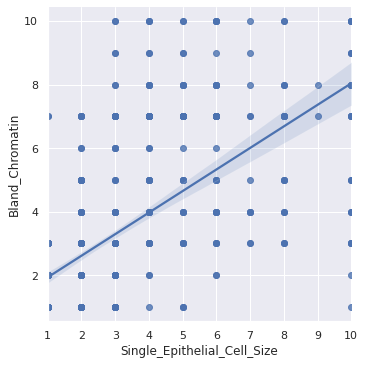

In [109]:
#LM PLOT
fig=sns.lmplot(x="Single_Epithelial_Cell_Size", y="Bland_Chromatin",data=bcw)

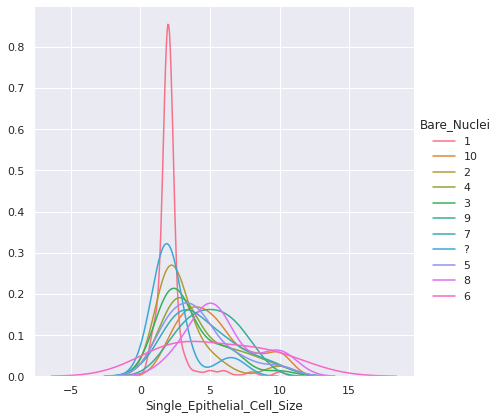

In [110]:
#FACET GRID
sns.FacetGrid(bcw, hue="Bare_Nuclei", size=6) \
   .map(sns.kdeplot, "Single_Epithelial_Cell_Size") \
   .add_legend()
plt.ioff()